<a href="https://colab.research.google.com/github/DarshikaKhandelwal/Cyclones/blob/main/FeatureVectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opencv-python

In [ ]:
import os
image_dir = os.listdir('/content/cyclones')
import cv2

In [ ]:
def calculate_center_of_gravity(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    M = cv2.moments(thresh)
    if M["m00"] != 0:
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])
        return cX, cY
    else:
        # Handle the case when the denominator is zero (no valid moments)
        return None

In [ ]:
f"/content/cyclones/" + os.path.join("20221101.12.Indian.IRImage.png.png")

'/content/cyclones/20221101.12.Indian.IRImage.png.png'

In [ ]:
# find the centre of gravity of images
from PIL import Image
import numpy as np
from scipy import ndimage
coordinates_centroid = []
for image_file in image_dir:
    # Construct the full file path
    image_path = f"/content/cyclones/" + os.path.join(image_file)

    # Open the image using PIL
    image = Image.open(image_path)
    image_gray = image.convert("L")
    image_array = np.array(image_gray)
    centroid = ndimage.center_of_mass(image_array)
    centroid_x = int(centroid[1])
    centroid_y = int(centroid[0])
    coordinates_centroid.append([centroid_x,centroid_y])

In [ ]:
pixels = []
for image_file in image_dir:
    # Construct the full file path
    image_path = f"/content/cyclones/" + os.path.join(image_file)
    # Open the image using PIL
    image = Image.open(image_path)
    width, height = image.size
    pixel_location = []
    for y in range(height):
      for x in range(width):
        # Get the pixel value at (x, y)
        pixel_location.append((x,y))
    pixels.append(pixel_location)

In [ ]:
import math
def euclidean_distance(point1, point2):
    # Calculate the Euclidean distance between two points in 2D space
    x1, y1 = point1
    x2, y2 = point2
    return math.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [ ]:
distances = []

In [ ]:
def calculate_distances(pixel_locations, centroids, distances):
    for i, image_pixels in enumerate(pixel_locations):
        centroid = centroids[i]
        image_distances = []
        for pixel_location in image_pixels:
            distance = euclidean_distance(pixel_location, centroid)
            image_distances.append(distance)
        distances.append(image_distances)
    return distances

In [ ]:
calculate_distances(pixels, coordinates_centroid, distances)

In [ ]:
max_distances = []
for i in distances:
  max_distances.append(max(i))

In [ ]:
min_distances = []
for i in distances:
  min_distances.append(min(i))

In [ ]:
ratios = []
for i, ed in enumerate(distances):
  r = []
  for j in ed:
    if(j!=0):
      r.append(j/max_distances[i])
    else:
      r.append(0)
  ratios.append(r)

In [ ]:
sums = []
for i in ratios:
  sums.append(sum(i))

In [ ]:
means = []
for i in sums:
  means.append(i/328)

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
dataset = pd.DataFrame(columns=['image','mean','variance','density','decentricity'])

In [ ]:
for val in ratios:
  val
len(val)

90000

In [ ]:
differences = []
for i, val in enumerate(ratios):
  sum = 0
  d = []
  for j in val:
    sum += ((j - means[i])**2)
  differences.append(sum)

In [ ]:
variances = []
for i in differences:
  variances.append(i/328)

328

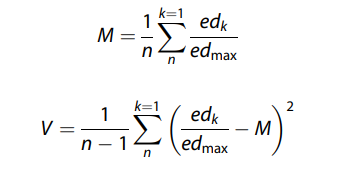


In [ ]:
ed_max = []
ed_min = []
for i in distances:
  i.remove(0)
  ed_max.append(max(i))
  ed_min.append(min(i))

In [ ]:
decentricities = []
for i in range(len(ed_max)):
  decentricities.append(ed_min[i]/ed_max[i])

In [ ]:
for i, value in enumerate(decentricities):
  dataset.loc[i, 'decentricity'] = value

In [ ]:
for i, value in enumerate(variances):
  dataset.loc[i, 'variance'] = value

In [ ]:
pi_value = math.pi

density_sums_x = []
horizontal_pixels = 0
density_sums_y = []
vertical_pixels = 0
for pixel in pixels:
  for i in pixel:
    x = i[0]
    y = i[1]
  horizontal_pixels += x
  vertical_pixels += y
  density_sums_x.append(horizontal_pixels)
  density_sums_y.append(vertical_pixels)

In [ ]:
density_sums_x[0] + density_sums_y[0]

598

In [ ]:
total_sum = []
for i in range(0, 328):
  total_sum.append(density_sums_x[i]+density_sums_y[i])

In [ ]:
densities = []
denominators = []
for i in ed_max:
  denominators.append((pi_value*i)**2)
for i, val in enumerate(total_sum):
  densities.append(val/denominators[i])

In [ ]:
for i, value in enumerate(densities):
  dataset.loc[i, 'density'] = value

In [ ]:
dataset.drop(dataset.index, inplace=True)

In [ ]:
for i, value in enumerate(image_dir):
  dataset.loc[i, 'image'] = value
for i, value in enumerate(means):
  dataset.loc[i, 'mean'] = value
for i, value in enumerate(variances):
  dataset.loc[i, 'variance'] = value
for i, value in enumerate(densities):
  dataset.loc[i, 'density'] = value
for i, value in enumerate(decentricities):
  dataset.loc[i, 'decentricity'] = value

In [ ]:
dataset.to_csv('/content/features.csv', index = False)